In [1]:
import shutil
import pandas as pd
from yaml import safe_load
import numpy as np
import subsurface as ss
import pooch
import gempy as gp
import xarray 
import matplotlib.pyplot as plt
import subsurface.reader.read_netcdf
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.viewer.pv import drawStreamLines, drawSlice
from matplotlib.patches import PathPatch
from gempy.core.grid_modules import grid_types as gt
from gempy.core.grid_modules import section_utils

c:\Users\Nino Menzel\Anaconda\envs\geomod\lib\site-packages\subsurface\reader\__init__.py:12: UserWarning: Welly or Striplog not installed. No well reader possible.
  warnings.warn("Welly or Striplog not installed. No well reader possible.")
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\Users\Nino Menzel\Anaconda\envs\geomod\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


No module named 'osgeo'


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [1]:
import gempy as gp

No module named 'osgeo'


C:\Users\adam-n26oi1ut6d6wx0h\AppData\Local\miniconda3\envs\gui_gempy\lib\site-packages\subsurface\reader\__init__.py:12: UserWarning: Welly or Striplog not installed. No well reader possible.
  warnings.warn("Welly or Striplog not installed. No well reader possible.")
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\adam-n26oi1ut6d6wx0h\AppData\Local\miniconda3\envs\gui_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): 

In [2]:
claystone = gp.create_model('Rock salt, concordant')

gp.init_data(claystone, [0, 2000., 0, 2000., -1000., 0], [50, 50, 100], 
             path_i = 'Claystone_Model_South.csv',
             path_o = 'CLaystone_Orientation_South.csv',
             default_values=False)

gp.map_stack_to_surfaces(claystone, {"Tertiary":'Tertiary', "Lias":('Upper_Jurassic_3','Upper_Jurassic_2','Upper_Jurassic_1'),
"Dogger":('Mid_Jurassic_3','Mid_Jurassic_2'), "Opalinus_Clay":'Mid_Jurassic_1',"Malm":('Lower_Jurassic_2','Lower_Jurassic_1'),
"Keuper":('Keuper_3','Keuper_2','Keuper_1'), "Muschelkalk":'Basement'}, sort_geometric_data=False)


section = {'Section1':([0,0],[2000,1000],[50,100])}

claystone.set_section_grid(section)

gp.set_interpolator(claystone,compile_theano=True,theano_optimizer='fast_run')

Active grids: ['regular']
Active grids: ['regular' 'sections']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                                 values
range                             3000
$C_o$                           214286
drift equations  [3, 3, 3, 3, 3, 3, 3]


In [4]:
gp.plot_3d(claystone)

C:\Users\adam-n26oi1ut6d6wx0h\AppData\Local\miniconda3\envs\gui_gempy\lib\site-packages\gempy\core\solution.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.sections = np.array(
C:\Users\adam-n26oi1ut6d6wx0h\AppData\Local\miniconda3\envs\gui_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


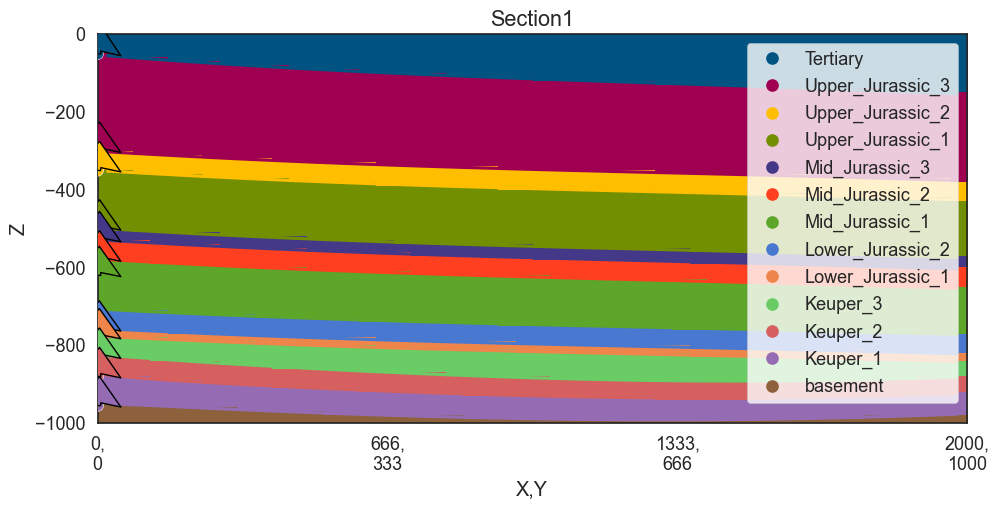

In [5]:
claystone_model = gp.compute_model(claystone) #Compute Model
gp.plot_2d(claystone,section_names=['Section1'])

In [6]:
gp.plot_3d(claystone)

C:\Users\adam-n26oi1ut6d6wx0h\AppData\Local\miniconda3\envs\gui_gempy\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


In [7]:
gp.save_model?

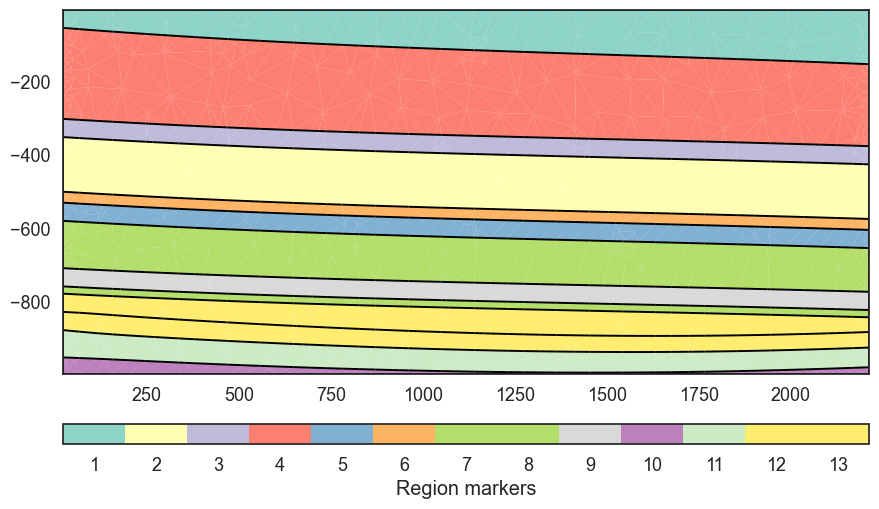

In [22]:
verts, colors, extent = section_utils.get_polygon_dictionary(claystone, 'Section1')
plt.close('all')
geoms = {form: PathPatch(path[0]) for form, path in verts.items()}
allv = [i.get_verts() for i in geoms.values()]


unit_count = 0
marker_count = 0
line=[]
#mapping={}
units = {}


for name, unit in verts.items():
    unit_count += 1
    units[name]=unit_count


for i,elem in enumerate(allv):
    polys = mt.createPolygon(allv[i],isClosed=True,marker=i+1)
    line.append(polys)
world = mt.mergePLC(line)
#world.addRegionMarker([250,-200],10)
pg.show(world)
world.yMax()

#Export world:
#world.exportVTK('C:/Users/Nino Menzel/Code/Reference_Model/Claystone/')

In [5]:
world.translate([0,-world.ymax()])
world.ymax()

0.0

In [6]:
with open('C:/Users/Nino Menzel/Code/Reference_Model/Claystone/ReferenceModelSouth_Clay.yaml', 'r') as f:
    df = pd.json_normalize(safe_load(f))

array([-650. , -652.5, -655. , -657.5, -660. , -662.5, -665. , -667.5,
       -670. , -672.5, -675. , -677.5, -680. , -682.5, -685. , -687.5,
       -690. , -692.5, -695. , -697.5, -700. , -702.5, -705. , -707.5,
       -710. , -712.5, -715. , -717.5, -720. , -722.5, -725. , -727.5,
       -730. , -732.5, -735. , -737.5, -740. , -742.5, -745. , -747.5,
       -750. ])

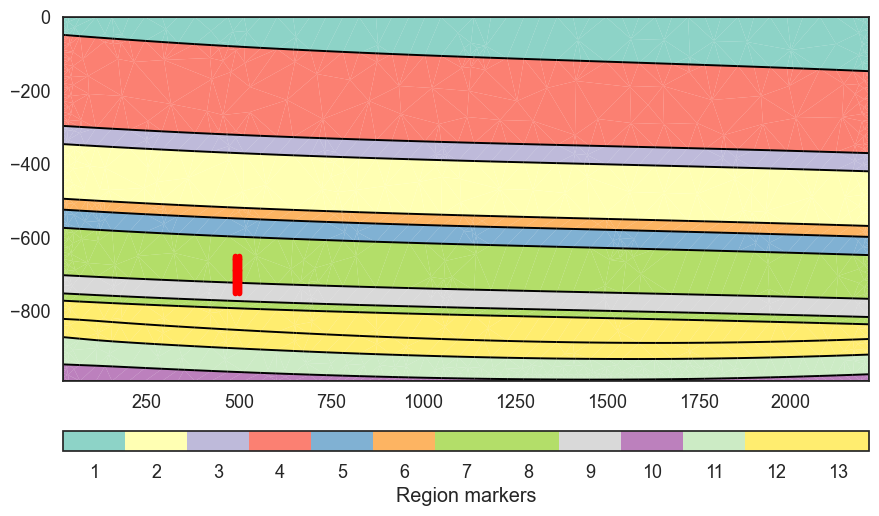

In [7]:
resistivities=[[1,df['electricalResistivity_Tertiary.value']],[2,df['electricalResistivity_Jo1.value']],[3,df['electricalResistivity_Jo2.value']],[4,df['electricalResistivity_Jo3.value']],
[5,df['electricalResistivity_Jm2.value']],[6,df['electricalResistivity_Jm3.value']],[7,df['electricalResistivity_Opalinus_clay.value']],[8,df['electricalResistivity_Ju1.value']],
[9,df['electricalResistivity_Ju2.value']],[10,2500],[11,df['electricalResistivity_K1.value']],[12,df['electricalResistivity_K2.value']],[13,df['electricalResistivity_K3.value']]]

from pygimli.physics import ert


xbh = [490, 500]
zbh = -np.arange(650.,752.5,2.5)

data = ert.DataContainer()
for x in xbh:
    for z in zbh:
        data.createSensor([x,z])

ax, cb = pg.show(world)
ax.plot(pg.x(data), pg.y(data), "ro", markersize=4)
zbh

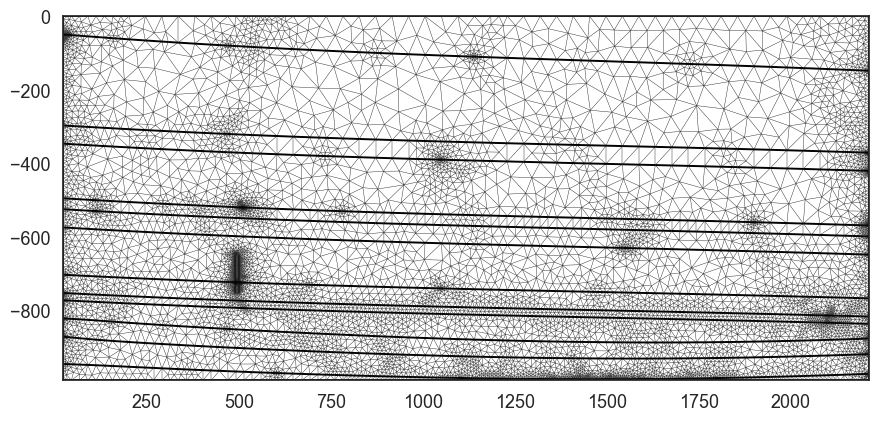

In [8]:
space = .75
for pos in data.sensorPositions():
    world.createNode(pos)
    world.createNode(pos-[0.0,space])
    world.createNode(pos+[0.0,space])
    world.createNode(pos-[space,0.0])
    world.createNode(pos+[space,0.0])

    
mesh = mt.createMesh(world,quality=34)
ax,cb = pg.show(mesh, label=pg.unit('vel'), cMap=pg.cmap('vel'), logScale=False)
#ax.plot(pg.x(data), pg.y(data), "ro")

In [9]:
for n in mesh.nodes():
    if  len(n.cellSet()) == 0:
        print(n, n.pos(), " have no cells!")

In [10]:
schemes = ['wa','dd','slm']

for s in schemes:
    ertScheme = ert.createData(elecs=data.sensorPositions(), schemeName=s)
    if 'dd' in s:
        dd_e = ert.createData(elecs=data.sensorPositions(), schemeName='dd')
        ertScheme.add(dd_e)
    if 'wa' in s:
        wa_e = ert.createData(elecs=data.sensorPositions(), schemeName='wa')
        ertScheme.add(wa_e)
    if 'slm' in s:
        slm_e = ert.createData(elecs=data.sensorPositions(), schemeName='slm')
        ertScheme.add(slm_e)
    geom = ert.createGeometricFactors(ertScheme)
    ertScheme.set('k', geom)


21/02/23 - 09:39:07 - pyGIMLi - INFO - Cache c:\Users\Nino Menzel\Anaconda\envs\geomod\lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 4): C:\Users\Nino Menzel\AppData\Roaming\pygimli\Cache\10185080020892277829
21/02/23 - 09:39:07 - pyGIMLi - INFO - Cache c:\Users\Nino Menzel\Anaconda\envs\geomod\lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 4): C:\Users\Nino Menzel\AppData\Roaming\pygimli\Cache\9372473217989790475
21/02/23 - 09:39:07 - pyGIMLi - INFO - Cache c:\Users\Nino Menzel\Anaconda\envs\geomod\lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 4): C:\Users\Nino Menzel\AppData\Roaming\pygimli\Cache\17250567867170249191


In [11]:
data_wa = ert.simulate(mesh,wa_e,resistivities)
data_wa

21/02/23 - 09:39:08 - pyGIMLi - INFO - Calculate geometric factors.


Data: Sensors: 82 data: 1080, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'rhoa', 'valid']

In [12]:
data_wa['rhoa']

1080 [10.000677192887458,...,12.343039026105599]

In [13]:
data_wa['err']=ert.estimateError(data_wa,absoluteError=0.001)

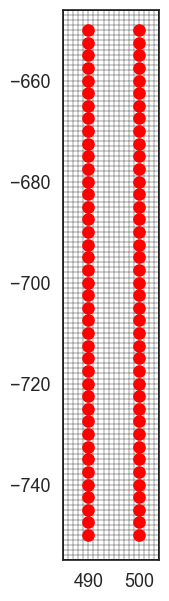

In [14]:
x = np.arange((min(xbh)-5),(max(xbh)+5),1)
y= np.arange((min(zbh)-5),max(zbh)+5,1)
invmesh = pg.meshtools.createGrid(x,y)
ax, _ = pg.show(invmesh, hold = True)
ax.plot(pg.x(data_wa),pg.y(data_wa), "ro")

In [15]:
mgr = ert.ERTManager(data_wa)

inv = mgr.invert(data_wa, invmesh, lam=20, verbose=True)
print("chi^2 = {:.2f}".format(mgr.inv.chi2()))

21/02/23 - 09:39:27 - pyGIMLi - INFO - Found 1 regions.
21/02/23 - 09:39:27 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/02/23 - 09:39:27 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.
21/02/23 - 09:39:28 - pyGIMLi - INFO - Use median(data values)=12.071159388625839
21/02/23 - 09:39:28 - pyGIMLi - INFO - Created startmodel from forward operator: 2071 [12.071159388625839,...,12.071159388625839]
21/02/23 - 09:39:28 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000179DD59A630>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000179DD59AE50>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000179DD59ACC0>
min/max (data): 4.12/34.99
min/max (error): 3%/3.02%
min/max (start model): 12.07/12.07
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 92.23 (dPhi = 69.83%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 85.38 (dPhi = 5.67%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 82.84 (dPhi = 2.34%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 81.64 (dPhi = 1.16%) lam: 20.0
#####################################################

chi^2 = 81.64


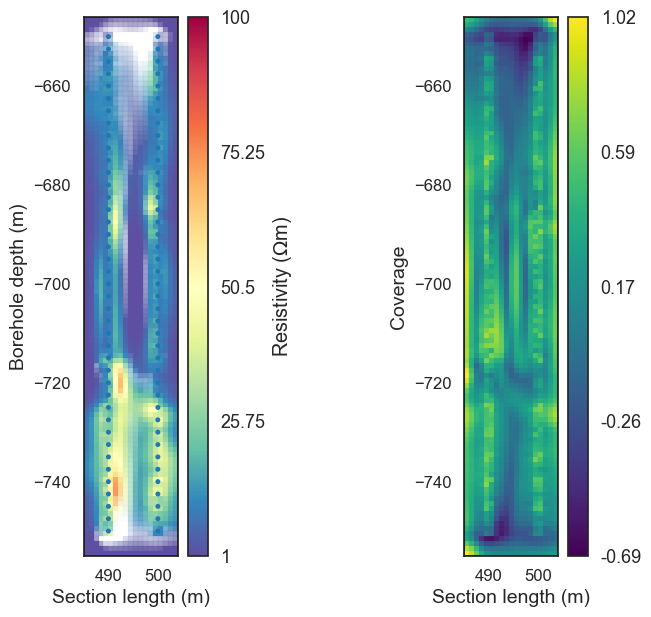

In [17]:
#textstr = ('Chi =', mgr.inv.chi2())


fig, (ax1,ax2) = plt.subplots(1,2, figsize = (9,7))

fig, cbar = mgr.showResult(ax=ax1, orientation="vertical", cMin = 1, cMax=100, logScale=False)
ax1.set_xlabel("Section length (m)", fontsize = 14)
ax1.set_ylabel ("Borehole depth (m)", fontsize = 14)
#ax1.text(0.05,0.95,textstr, transform = ax.transAxes, fontsize = 10, verticalalignment = 'top')
cov = mgr.coverage()

for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(12)
    label.set_fontweight("ultralight")

pg.show(invmesh,cov, orientation = "vertical", ax=ax2)
ax2.set_ylabel("Coverage", fontsize = 14)
ax2.set_xlabel("Section length (m)", fontsize = 14)

print("chi^2 = {:.2f}".format(mgr.inv.chi2()))

In [ ]:
wenner = ert.createData(elecs=data.sensorPositions(), schemeName='wa')

data_wenner = ert.simulate(mesh,wenner,resistivities)

07/02/23 - 13:15:55 - pyGIMLi - INFO - Calculate geometric factors.


In [ ]:
data_wenner['err']=ert.estimateError(data_wenner, absoluteError=0.02)

In [ ]:
mgrw = ert.ERTManager(data_wenner)

inv = mgrw.invert(data_wenner, invmesh, lam=50, verbose=True)
print("chi^2 = {:.2f}".format(mgrw.inv.chi2()))

07/02/23 - 13:17:36 - pyGIMLi - INFO - Found 1 regions.
07/02/23 - 13:17:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/02/23 - 13:17:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/02/23 - 13:17:36 - pyGIMLi - INFO - Use median(data values)=1441.7347319379392
07/02/23 - 13:17:36 - pyGIMLi - INFO - Created startmodel from forward operator: 2071 [1441.7347319379392,...,1441.7347319379392]
07/02/23 - 13:17:36 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002AEC8B72AE0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002AEC8B72C20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002AEC8B72B80>
min/max (data): 39.29/2500
min/max (error): 3%/3.05%
min/max (start model): 1442/1442
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 15.27 (dPhi = 82.74%) lam: 50
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 5.52 (dPhi = 25.36%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 4.84 (dPhi = 2.2%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 4.65 (dPhi = 0.61%) lam: 50.0
##########################################################

chi^2 = 3.12


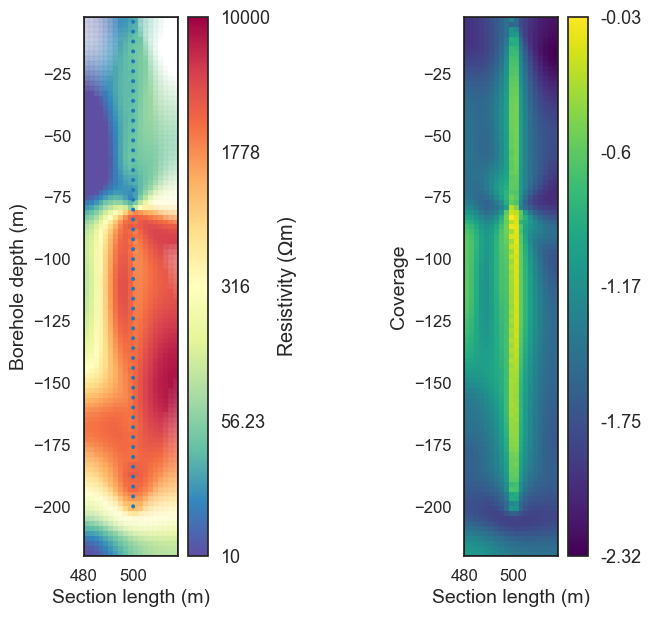

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (9,7))

fig, cbar = mgrw.showResult(ax=ax1, orientation="vertical", cMin = 10, cMax=1e4)
ax1.set_xlabel("Section length (m)", fontsize = 14)
ax1.set_ylabel ("Borehole depth (m)", fontsize = 14)
#ax1.text(0.05,0.95,textstr, transform = ax.transAxes, fontsize = 10, verticalalignment = 'top')
covw = mgrw.coverage()

for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(12)
    label.set_fontweight("ultralight")

pg.show(invmesh, covw, orientation = "vertical", ax=ax2)
ax2.set_ylabel("Coverage", fontsize = 14)
ax2.set_yticks(np.arange(-200,0,step=25))
ax2.set_xlabel("Section length (m)", fontsize = 14)

print("chi^2 = {:.2f}".format(mgr.inv.chi2()))

In [ ]:
schemes = ['wa', 'pd', 'dd', 'slm']

In [ ]:
poldi = ert.createData(elecs=data.sensorPositions(), schemeName='pd')

data_poldi = ert.simulate(mesh,poldi,resistivities)

07/02/23 - 13:37:23 - pyGIMLi - INFO - Calculate geometric factors.


In [ ]:
data_poldi['err']=ert.estimateError(data_poldi, absoluteError=0.02)

In [ ]:
mgrpd = ert.ERTManager(data_poldi)

inv = mgrpd.invert(data_poldi, invmesh, lam=50, verbose=True)
print("chi^2 = {:.2f}".format(mgrpd.inv.chi2()))

07/02/23 - 13:38:10 - pyGIMLi - INFO - Found 1 regions.
07/02/23 - 13:38:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/02/23 - 13:38:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/02/23 - 13:38:10 - pyGIMLi - INFO - Use median(data values)=151.78992811130928
07/02/23 - 13:38:10 - pyGIMLi - INFO - Created startmodel from forward operator: 2071 [151.78992811130928,...,151.78992811130928]
07/02/23 - 13:38:10 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002AEE288D220>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002AEE288DEA0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002AEE288D130>
min/max (data): 8.12/2499
min/max (error): 3%/3.25%
min/max (start model): 152/152
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 392.21 (dPhi = 60.87%) lam: 50
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 65.51 (dPhi = 81.49%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 29.0 (dPhi = 48.45%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 20.63 (dPhi = 21.19%) lam: 50.0
-------------------------------------------------------

chi^2 = 3.12


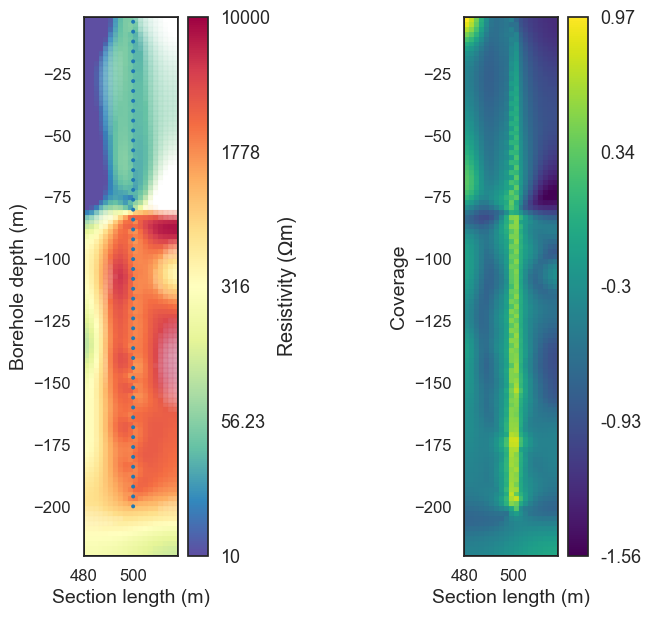

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (9,7))

fig, cbar = mgrpd.showResult(ax=ax1, orientation="vertical", cMin = 10, cMax=1e4)
ax1.set_xlabel("Section length (m)", fontsize = 14)
ax1.set_ylabel ("Borehole depth (m)", fontsize = 14)
#ax1.text(0.05,0.95,textstr, transform = ax.transAxes, fontsize = 10, verticalalignment = 'top')
covpd = mgrpd.coverage()

for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(12)
    label.set_fontweight("ultralight")

pg.show(invmesh, covpd, orientation = "vertical", ax=ax2)
ax2.set_ylabel("Coverage", fontsize = 14)
ax2.set_yticks(np.arange(-200,0,step=25))
ax2.set_xlabel("Section length (m)", fontsize = 14)

print("chi^2 = {:.2f}".format(mgr.inv.chi2()))

In [ ]:
slm = ert.createData(elecs=data.sensorPositions(), schemeName='slm')

data_slm = ert.simulate(mesh,slm,resistivities)

07/02/23 - 13:41:46 - pyGIMLi - INFO - Calculate geometric factors.


In [ ]:
data_slm['err']=ert.estimateError(data_slm, absoluteError=0.02)

In [ ]:
mgrslm = ert.ERTManager(data_slm)

inv = mgrslm.invert(data_slm, invmesh, lam=50, verbose=True)
print("chi^2 = {:.2f}".format(mgrslm.inv.chi2()))

07/02/23 - 13:42:29 - pyGIMLi - INFO - Found 1 regions.
07/02/23 - 13:42:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/02/23 - 13:42:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/02/23 - 13:42:29 - pyGIMLi - INFO - Use median(data values)=1523.2463330151918
07/02/23 - 13:42:29 - pyGIMLi - INFO - Created startmodel from forward operator: 2071 [1523.2463330151918,...,1523.2463330151918]
07/02/23 - 13:42:29 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002AE11F14540>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002AF1FFF3D10>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002AF1FFF3A40>
min/max (data): 18.66/2500
min/max (error): 3%/3.11%
min/max (start model): 1523/1523
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 16.42 (dPhi = 90.05%) lam: 50
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 4.24 (dPhi = 33.65%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 3.53 (dPhi = 3.66%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 3.34 (dPhi = 1.03%) lam: 50.0
#########################################################

chi^2 = 3.12


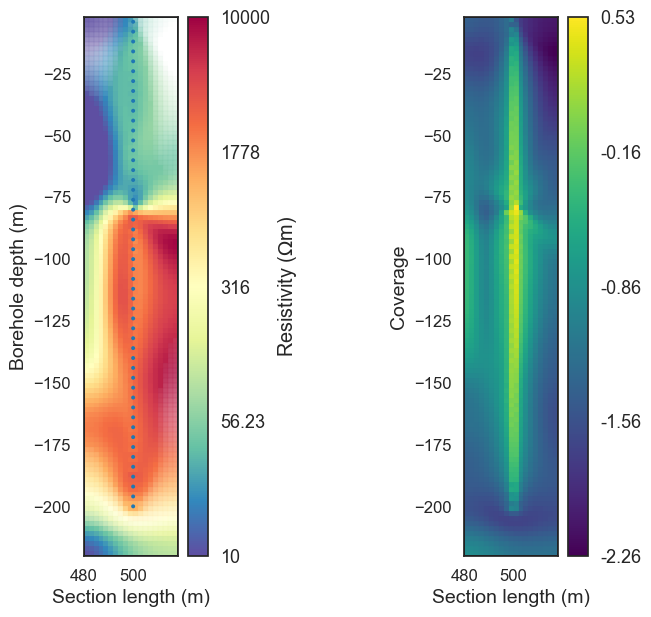

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (9,7))

fig, cbar = mgrslm.showResult(ax=ax1, orientation="vertical", cMin = 10, cMax=1e4)
ax1.set_xlabel("Section length (m)", fontsize = 14)
ax1.set_ylabel ("Borehole depth (m)", fontsize = 14)
#ax1.text(0.05,0.95,textstr, transform = ax.transAxes, fontsize = 10, verticalalignment = 'top')
covslm = mgrslm.coverage()

for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(12)
    label.set_fontweight("ultralight")

pg.show(invmesh, covslm, orientation = "vertical", ax=ax2)
ax2.set_ylabel("Coverage", fontsize = 14)
ax2.set_yticks(np.arange(-200,0,step=25))
ax2.set_xlabel("Section length (m)", fontsize = 14)

print("chi^2 = {:.2f}".format(mgr.inv.chi2()))

chi² = 3.12
chi² = 4.65
chi² = 75.15
chi² = 3.34


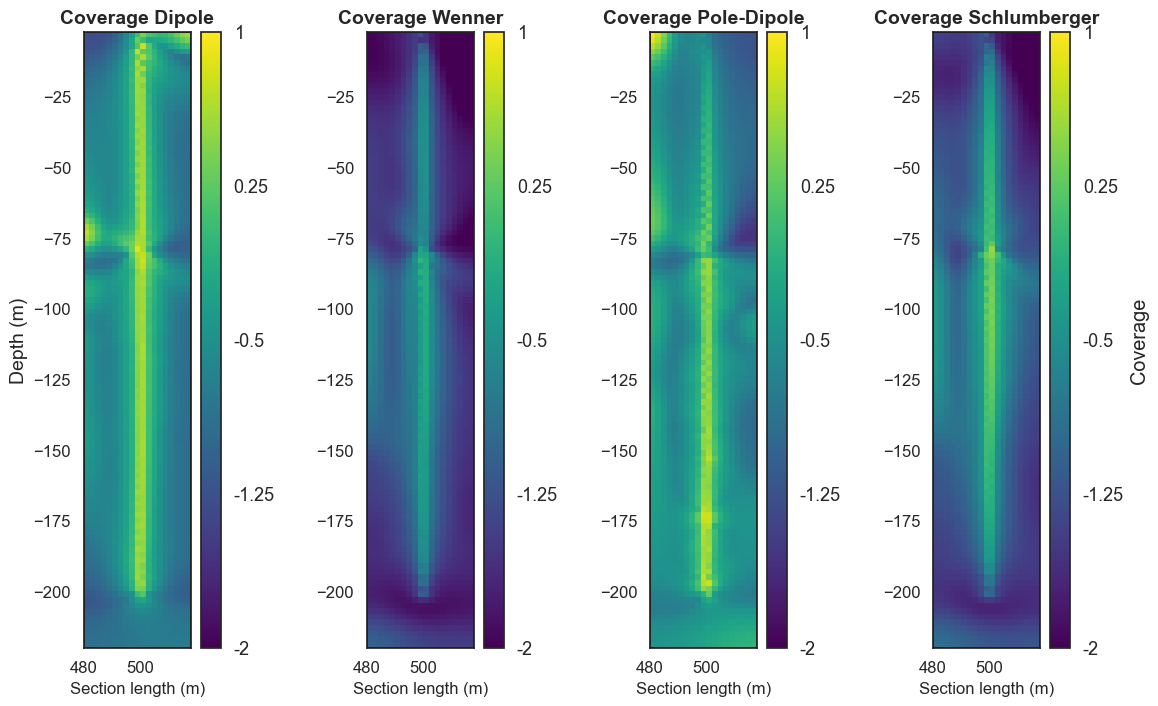

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (14,8))


for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels() + ax3.get_xticklabels() + ax3.get_yticklabels() + ax4.get_xticklabels() + ax4.get_yticklabels()):
    label.set_fontsize(12)
    label.set_fontweight("ultralight")

pg.show(invmesh,cov, orientation = "vertical", ax=ax1, cMin=-2.0, cMax = 1.0)
ax1.set_ylabel("Depth (m)", fontsize = 14)
ax1.set_yticks(np.arange(-200,0,step=25))
ax1.set_xlabel("Section length (m)", fontsize = 12)
ax1.set_title("Coverage Dipole", fontweight = 'bold', fontsize = 14)

print("chi² = {:.2f}".format(mgr.inv.chi2()))

pg.show(invmesh, covw, orientation = "vertical", ax=ax2,cMin=-2.0, cMax = 1.0)
ax2.set_xlabel("Section length (m)", fontsize = 12)
ax2.set_title("Coverage Wenner", fontweight = 'bold', fontsize = 14)

print("chi² = {:.2f}".format(mgrw.inv.chi2()))

pg.show(invmesh, covpd, orientation = "vertical", ax=ax3,cMin=-2.0, cMax = 1.0)
ax3.set_xlabel("Section length (m)", fontsize = 12)
ax3.set_title("Coverage Pole-Dipole", fontweight = 'bold', fontsize = 14)

print("chi² = {:.2f}".format(mgrpd.inv.chi2()))


pg.show(invmesh, covslm, orientation = "vertical", ax=ax4, label="Coverage", cMin=-2.0, cMax = 1.0)
ax4.set_title("Coverage Schlumberger", fontweight = 'bold', fontsize = 14)
ax4.set_xlabel("Section length (m)", fontsize = 12)

print("chi² = {:.2f}".format(mgrslm.inv.chi2()))